<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/tf/c3_w3_multiple_layer_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer LSTM

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import Sequential
from tensorflow.keras import layers

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

tf.__version__

'2.3.0'

In [2]:
# get the data
dataset, info = tfds.load(
    'imdb_reviews/subwords8k', 
    with_info=True,
    as_supervised=True
)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteA0HGVH/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteA0HGVH/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteA0HGVH/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
tokenizer.vocab_size

8185

In [5]:
tf.compat.v1.data.get_output_shapes(train_dataset)

(TensorShape([None]), TensorShape([]))

In [6]:
train_dataset.cardinality().numpy()

25000

In [7]:
len(next(iter(train_dataset.take(1)))[0].numpy())

163

In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(
    BATCH_SIZE, 
    tf.compat.v1.data.get_output_shapes(train_dataset)
)
test_dataset = test_dataset.padded_batch(
    BATCH_SIZE,
    tf.compat.v1.data.get_output_shapes(test_dataset)
)

In [12]:
model = Sequential([
  layers.Embedding(tokenizer.vocab_size, 64),
  layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
  layers.Bidirectional(layers.LSTM(32)),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid')                 
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
NUM_EPOCHS = 10
history = model.fit(
    train_dataset,
    epochs=NUM_EPOCHS, 
    validation_data=test_dataset
)

Epoch 1/10
391/391 [==============================] - 108s 276ms/step - loss: 0.5828 - accuracy: 0.6937 - val_loss: 0.5208 - val_accuracy: 0.7712
Epoch 2/10
391/391 [==============================] - 108s 277ms/step - loss: 0.4614 - accuracy: 0.7929 - val_loss: 0.4497 - val_accuracy: 0.7928
Epoch 3/10
391/391 [==============================] - 109s 278ms/step - loss: 0.3173 - accuracy: 0.8757 - val_loss: 0.3479 - val_accuracy: 0.8544
Epoch 4/10
391/391 [==============================] - 109s 278ms/step - loss: 0.2414 - accuracy: 0.9121 - val_loss: 0.3352 - val_accuracy: 0.8580
Epoch 5/10
391/391 [==============================] - 109s 278ms/step - loss: 0.1955 - accuracy: 0.9319 - val_loss: 0.3451 - val_accuracy: 0.8701
Epoch 6/10
391/391 [==============================] - 108s 276ms/step - loss: 0.1481 - accuracy: 0.9528 - val_loss: 0.3585 - val_accuracy: 0.8722
Epoch 7/10
391/391 [==============================] - 109s 279ms/step - loss: 0.1098 - accuracy: 0.9673 - val_loss: 0.4089 -

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

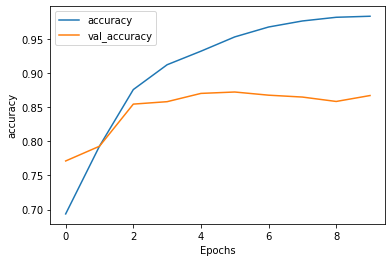

In [17]:
plot_graphs(history, 'accuracy')

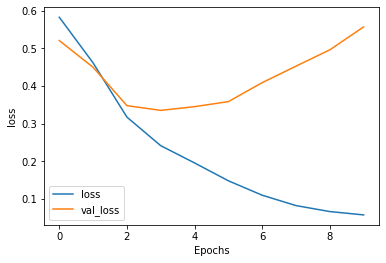

In [18]:
plot_graphs(history, 'loss')